In [1]:
import pandas as pd

# Đường dẫn tới file csv
csv_path = '/home/temp-user/workspace/plate-recognition-low-resolution/approaches/paddle/output/inference_results/rec_results_model_1_50_epochs.csv'

# Đọc và tính toán
df = pd.read_csv(csv_path)
results = df[['exact_match', 'ned']].mean()

print(f"Average EM:  {results['exact_match']:.4f}")
print(f"Average NED: {results['ned']:.4f}")

Average EM:  0.1070
Average NED: 0.5886


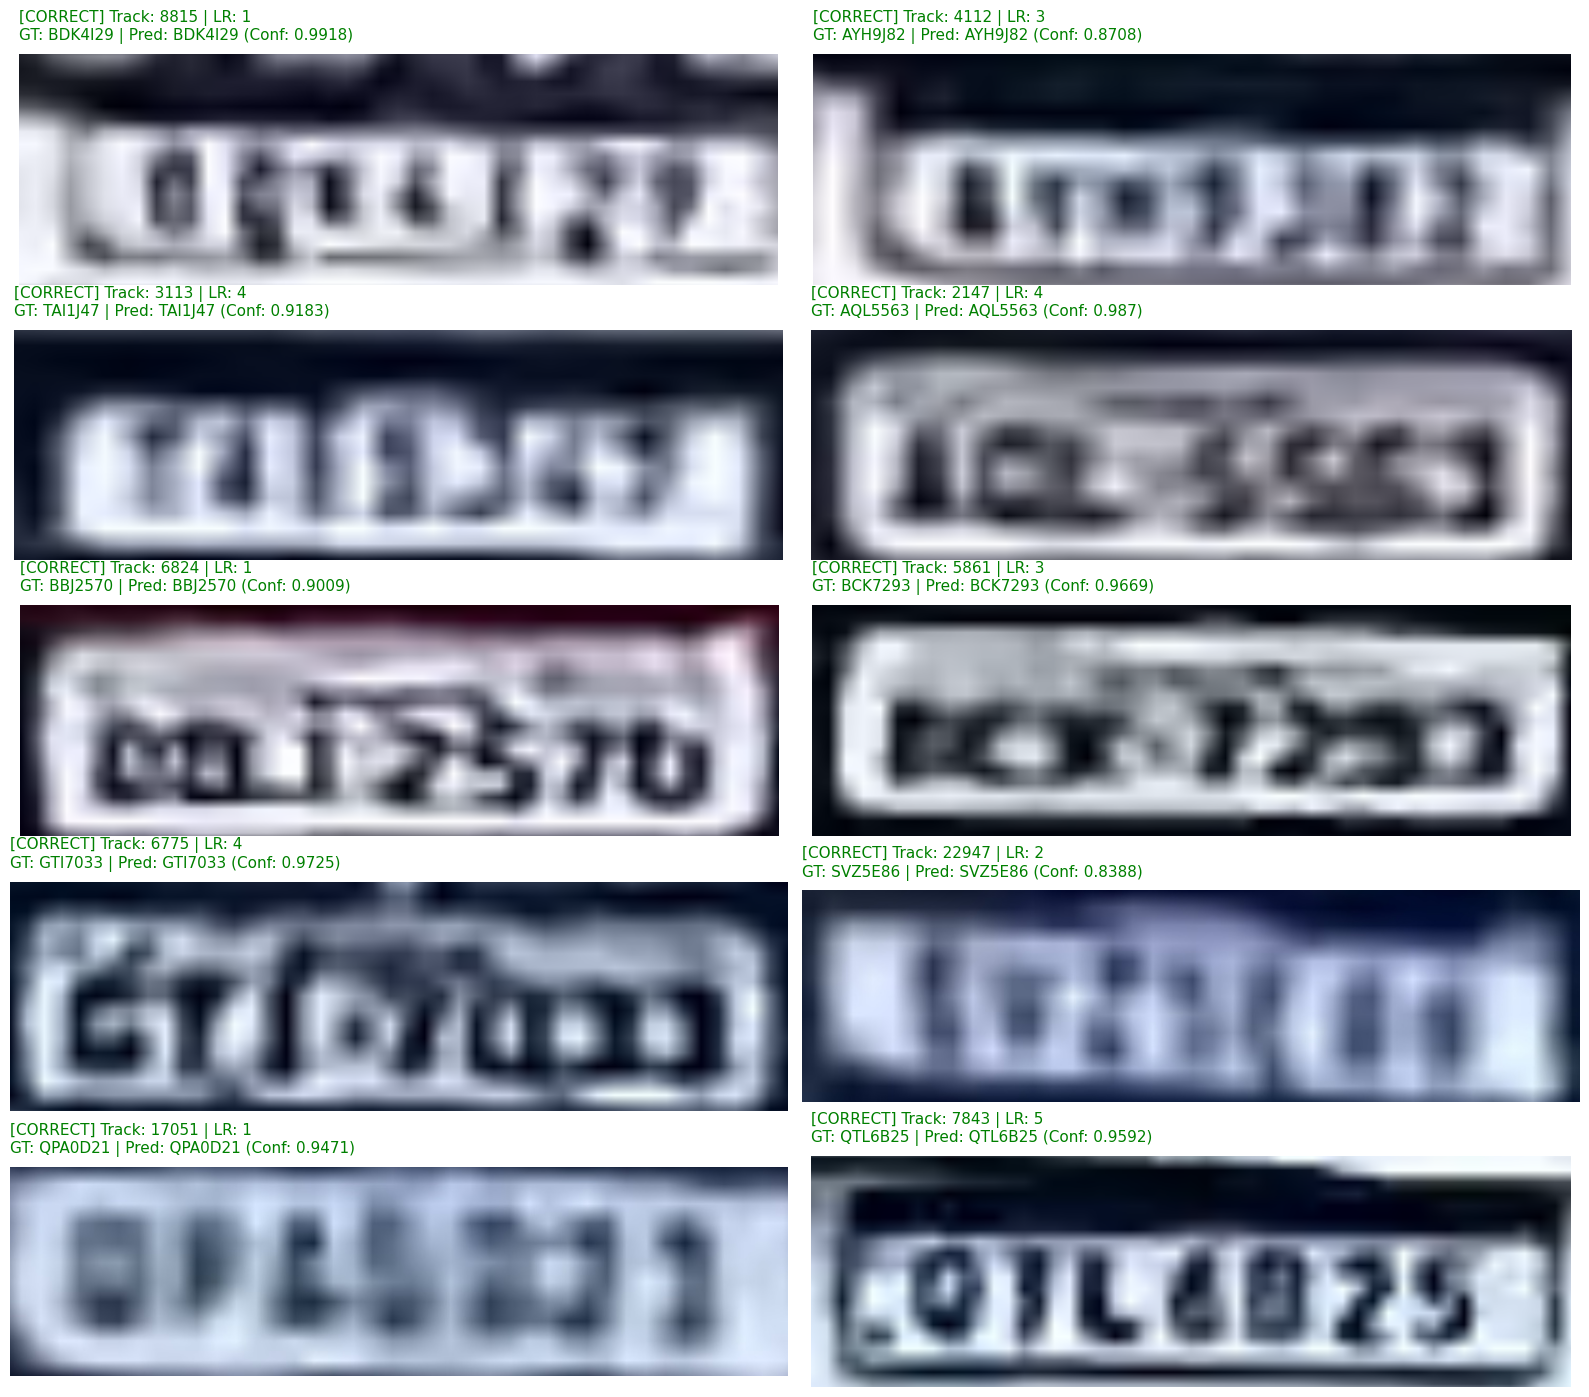

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

def visualize_results(csv_path, mode='correct', num_samples=10):
    """
    mode: 'correct' để xem các mẫu đúng, 'incorrect' để xem các mẫu sai.
    """
    # 1. Đọc file kết quả
    if not os.path.exists(csv_path):
        print(f"Lỗi: Không tìm thấy file {csv_path}")
        return
        
    df = pd.read_csv(csv_path)
    
    # 2. Lọc dữ liệu
    if mode == 'correct':
        subset = df[df['exact_match'].astype(float) == 1.0]
        label_title = "CORRECT"
        color = 'green'
    else:
        subset = df[df['exact_match'].astype(float) == 0.0]
        label_title = "INCORRECT"
        color = 'red'
        
    if len(subset) == 0:
        print(f"Không có mẫu nào thuộc loại '{mode}'")
        return

    # Shuffle và lấy mẫu ngẫu nhiên
    samples = subset.sample(min(num_samples, len(subset)))
    
    # 3. Vẽ biểu đồ
    cols = 2  # Số cột hiển thị
    rows = (len(samples) + 1) // cols
    plt.figure(figsize=(16, 2.8 * rows))
    
    for i, (_, row) in enumerate(samples.iterrows()):
        plt.subplot(rows, cols, i + 1)
        
        # Đọc ảnh
        img = cv2.imread(row['image_path'])
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img)
        else:
            plt.text(0.5, 0.5, "Image Not Found", ha='center')
        
        # Hiển thị thông tin Label và Prediction
        title = (f"[{label_title}] Track: {row['track_id']} | LR: {row['lr_num']}\n"
                 f"GT: {row['ground_truth']} | Pred: {row['prediction']} (Conf: {row['confidence']})")
        
        plt.title(title, color=color, fontsize=11, loc='left', pad=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# --- CHẠY HIỂN THỊ ---
# Bạn có thể đổi mode='incorrect' để xem những mẫu model đang bị nhầm lẫn
csv_file = '/home/temp-user/workspace/plate-recognition-low-resolution/approaches/paddle/results_val_model_1.csv'
visualize_results(csv_file, mode='correct', num_samples=10)